<h2 style='color:black' align='center'>Transfer Learning in Image Classification</h2>

**Transfer learning is a technique in machine learning where a pre-trained model, which has already learned features and patterns from a large dataset, is adapted to solve a new problem. This approach allows you to leverage the knowledge gained by the pre-trained model and apply it to your specific task, often with less data and computational resources than required when training a model from scratch.**

In [2]:
!pip install Pillow
!pip install tensorflow_hub
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Make predictions using ready made model (without any training)**

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE + (3,))
])

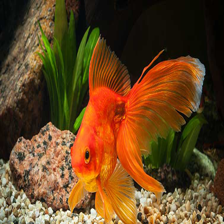

In [43]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[np.newaxis, ...]

array([[[[0.57254902, 0.58039216, 0.56078431],
         [0.57647059, 0.58431373, 0.56470588],
         [0.57254902, 0.58039216, 0.56078431],
         ...,
         [0.61176471, 0.61568627, 0.59607843],
         [0.60392157, 0.60784314, 0.58823529],
         [0.61568627, 0.61960784, 0.6       ]],

        [[0.64313725, 0.65098039, 0.63137255],
         [0.64313725, 0.65098039, 0.63137255],
         [0.64705882, 0.65490196, 0.63529412],
         ...,
         [0.66666667, 0.67058824, 0.65098039],
         [0.6745098 , 0.67843137, 0.65882353],
         [0.6745098 , 0.67843137, 0.65882353]],

        [[0.63921569, 0.64705882, 0.62745098],
         [0.64313725, 0.65098039, 0.63137255],
         [0.63921569, 0.64705882, 0.62745098],
         ...,
         [0.65882353, 0.6627451 , 0.64313725],
         [0.65882353, 0.6627451 , 0.64313725],
         [0.65490196, 0.65882353, 0.63921569]],

        ...,

        [[0.59215686, 0.59607843, 0.56470588],
         [0.6       , 0.60392157, 0.57254902]

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 964ms/step


(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [9]:
image_labels = []
with open("label.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

image_labels[predicted_label_index]

'goldfish'

In [10]:
image_labels[predicted_label_index]

'goldfish'

<h3 style='color:purple'>Load flowers dataset</h3>

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [12]:
data_dir

'./datasets/flower_photos'

In [13]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [14]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/12701063955_4840594ea6_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8708143485_38d084ac8c_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4727955343_0bb23ac4ae.jpg'),
 PosixPath('datasets/flower_photos/daisy/10841136265_af473efc60.jpg'),
 PosixPath('datasets/flower_photos/daisy/367020749_3c9a652d75.jpg')]

In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [16]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2568105249_15720d081f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5060536705_b370a5c543_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12338444334_72fcc2fc58_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2863863372_605e29c03e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/22679076_bdb4c24401_m.jpg')]

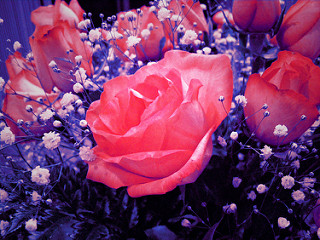

In [17]:
Image.open(str(roses[1]))

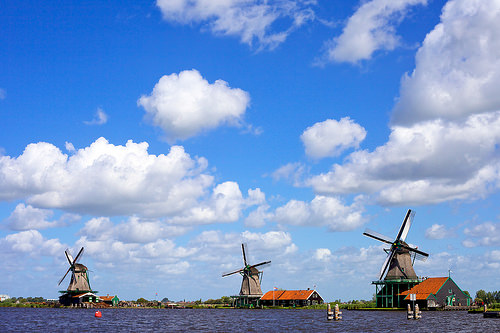

In [18]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [19]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [20]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [21]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2568105249_15720d081f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5060536705_b370a5c543_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12338444334_72fcc2fc58_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2863863372_605e29c03e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/22679076_bdb4c24401_m.jpg')]

In [22]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2568105249_15720d081f_n.jpg'

In [23]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [24]:
img.shape

(232, 320, 3)

In [25]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [26]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [27]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [29]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Make prediction using pre-trained model on new flowers dataset**

In [30]:
X[0].shape

(224, 224, 3)

In [31]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [32]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

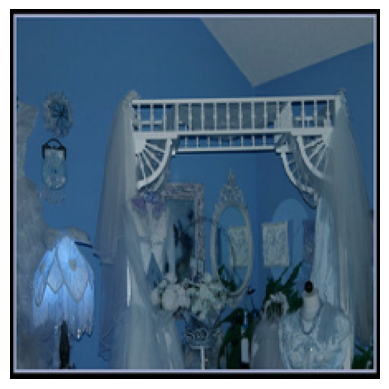

In [33]:
plt.axis('off')
plt.imshow(X[0])
plt.show()

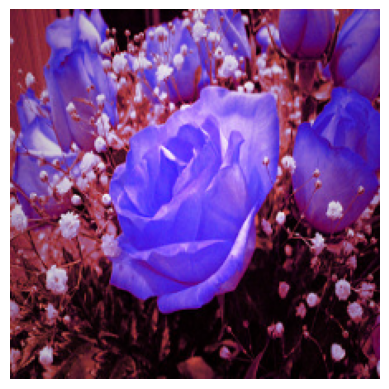

In [34]:
plt.axis('off')
plt.imshow(X[1])
plt.show()

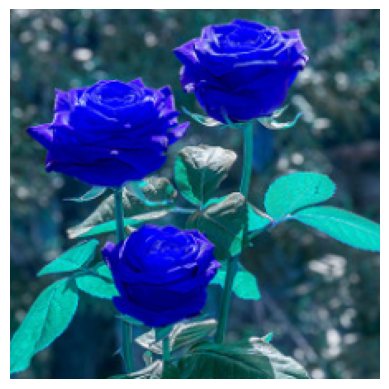

In [35]:
plt.axis('off')
plt.imshow(X[2])
plt.show()

In [36]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 3s 3s/step


array([722, 795, 795])

In [37]:
image_labels[795]

'shower curtain'

<h3 style='color:purple'>Now take pre-trained model and retrain it using flowers images</h3>

In [38]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [39]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 117s 1s/step - loss: 0.7618 - acc: 0.7249
Epoch 2/5
86/86 [==============================] - 117s 1s/step - loss: 0.4131 - acc: 0.8586
Epoch 3/5
86/86 [==============================] - 115s 1s/step - loss: 0.3285 - acc: 0.8844
Epoch 4/5
86/86 [==============================] - 115s 1s/step - loss: 0.2715 - acc: 0.9124
Epoch 5/5
86/86 [==============================] - 123s 1s/step - loss: 0.2401 - acc: 0.9222


In [42]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 42s 1s/step - loss: 0.3609 - acc: 0.8747


[0.3608563244342804, 0.8747276663780212]